In [1]:
import numpy as np
from scipy.stats import *
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns

%precision 3
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [2]:
# 한글 설정
# plt.rcParams["font.family"]='gulim'
# plt.rcParams["font.size"] = 12

### 1.데이터 로드

In [13]:
#엑셀 파일 불러오기 
real_estate = pd.read_excel('../data/Real estate valuation data set.xlsx', engine='openpyxl')
print(type(real_estate))

<class 'pandas.core.frame.DataFrame'>


Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [14]:
# 1-1 key값 확인
print(real_estate.keys())

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')


키값 key값
'No', 
'X1 transaction date', 
'X2 house age',
'X3 distance to the nearest MRT station',
'X4 number of convenience stores', 
'X5 latitude', 
'X6 longitude',
'Y house price of unit area'

The inputs are as follows
X1=the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)
X2=the house age (unit: year)
X3=the distance to the nearest MRT station (unit: meter)
X4=the number of convenience stores in the living circle on foot (integer)
X5=the geographic coordinate, latitude. (unit: degree)
X6=the geographic coordinate, longitude. (unit: degree)
Y= house price of unit area (10000 New Taiwan Dollar/Ping, where Ping is a local unit, 1 Ping = 3.3 meter squared)

입력 내용은 다음과 같습니다.
X1=거래일(예: 2013.250=2013년 3월, 2013.500=2013년 6월 등)
X2 = 세대수(단위: 년)
X3=가장 가까운 MRT(고속대중교통)역까지의 거리(단위: 미터)
X4=생활권 내 편의점 수(도보 기준)
X5=지리적 좌표, 위도. (단위: 정도)
X6=지리적 좌표, 경도. (단위: 정도)
Y= 단위 면적 집값(신 대만 달러/핑, 여기서 핑은 현지 단위, 1 핑 = 3.3 미터 제곱)

### 2. EDA[DataFrame 변환]

In [45]:
#2-1 no 제거
real_estate.head()
rest = real_estate.drop("No", axis ='columns')
rest.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [46]:
#2-2 rename
rest.rename({'X1 transaction date':'transaction_date', 
             'X2 house age':'house_age',
             'X3 distance to the nearest MRT station':'distance_nearest_MRT',
             'X4 number of convenience stores':'convenience_stores', 
             'X5 latitude':'latitude', 
             'X6 longitude':'longitude',
             'Y house price of unit area':'house_price'}, axis=1, inplace=True)
rest.head()

,transaction_date,house_age,distance_nearest_MRT,convenience_stores,latitude,longitude,house_price
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [47]:
#2-3 결측값 확인
rest.isna().sum(axis=0)

transaction_date        0
house_age               0
distance_nearest_MRT    0
convenience_stores      0
latitude                0
longitude               0
house_price             0
dtype: int64

In [48]:
#2-4 상관 분석
rest.corr()

,transaction_date,house_age,distance_nearest_MRT,convenience_stores,latitude,longitude,house_price
transaction_date,1.000000,0.017542,0.060880,0.009544,0.035016,-0.041065,0.087529
house_age,0.017542,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
distance_nearest_MRT,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
convenience_stores,0.009544,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
latitude,0.035016,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
longitude,-0.041065,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
house_price,0.087529,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


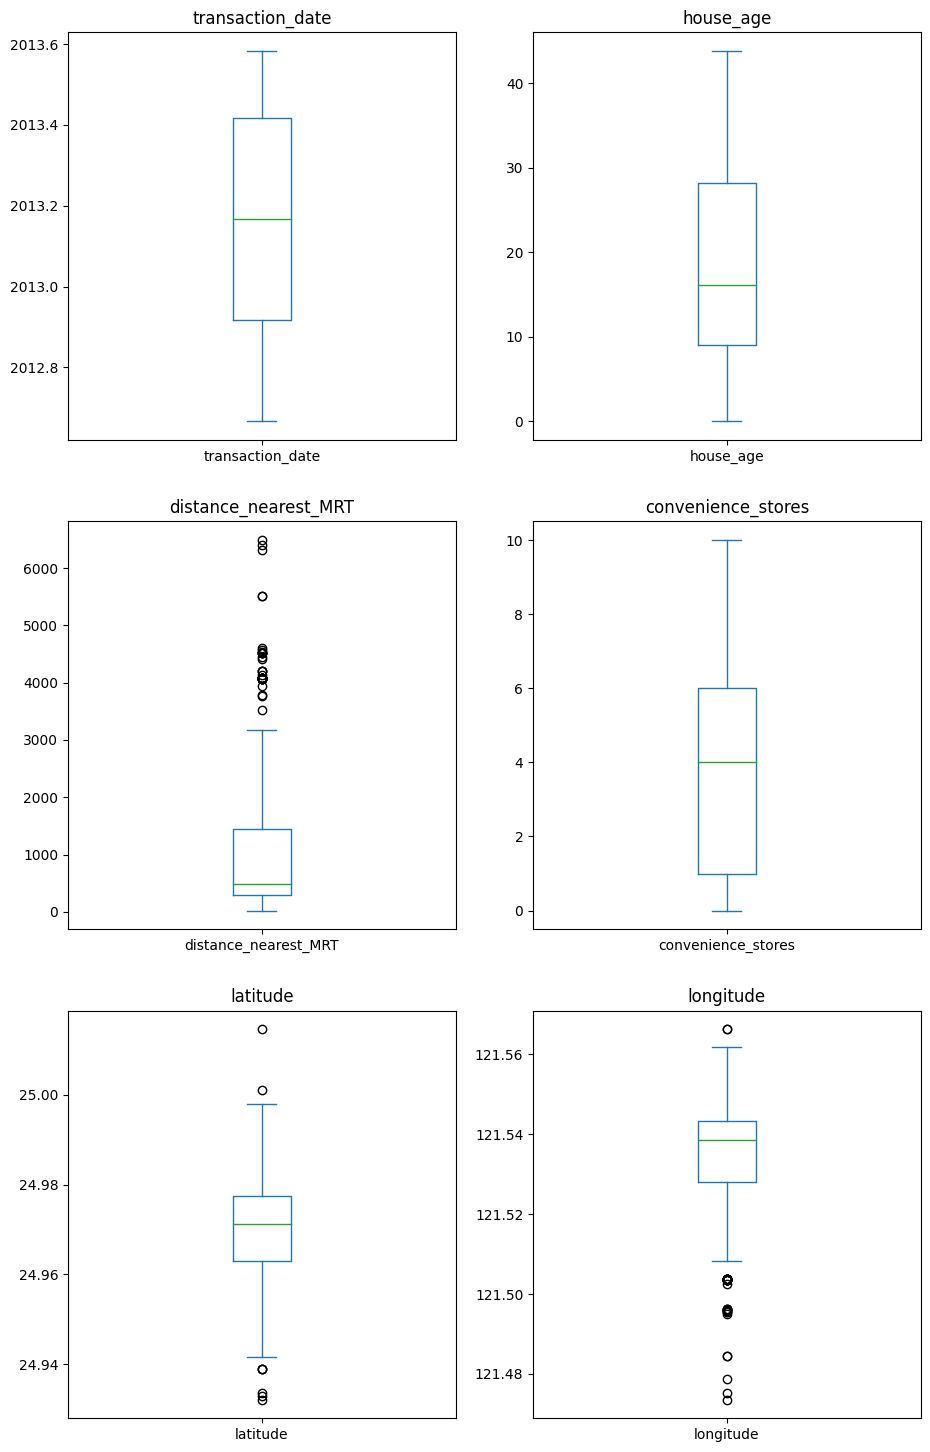

In [55]:
# 2-5 이상치 확인
def boxplot_iris(feature_names, dataset):
    i=1
    plt.figure(figsize=(11,18)) #사이즈
    for col in feature_names:  # X변수에 해당하는 그래프 개수를 그리기
        plt.subplot(3,2,i)     # 두 줄에 두 칸을 만들어서 인덱스 순으로 그리기
        plt.axis('on')
        plt.tick_params(axis='both',left =True)
        dataset[col].plot(kind='box', subplots=True)
        plt.title(col)
        i +=1
    plt.show()
boxplot_iris(rest.columns[:-1],rest)

#### 2-5 이상치 확인
distance_nearest_MRT = X3 =가장 가까운 MRT역(고속대중교통)까지의 거리(단위: 미터)  
latitude = X5 =지리적 좌표, 위도. (단위: 정도)  
longitude = X6 =지리적 좌표, 경도. (단위: 정도)  

X3으로 보아 대중교통까지의 거리가 엄청나게 멀리 있는 사람들이 존재한다  
X5, X6의 경우 다른 지역에 사는 사람들이 종종 있는 것으로 보인다  

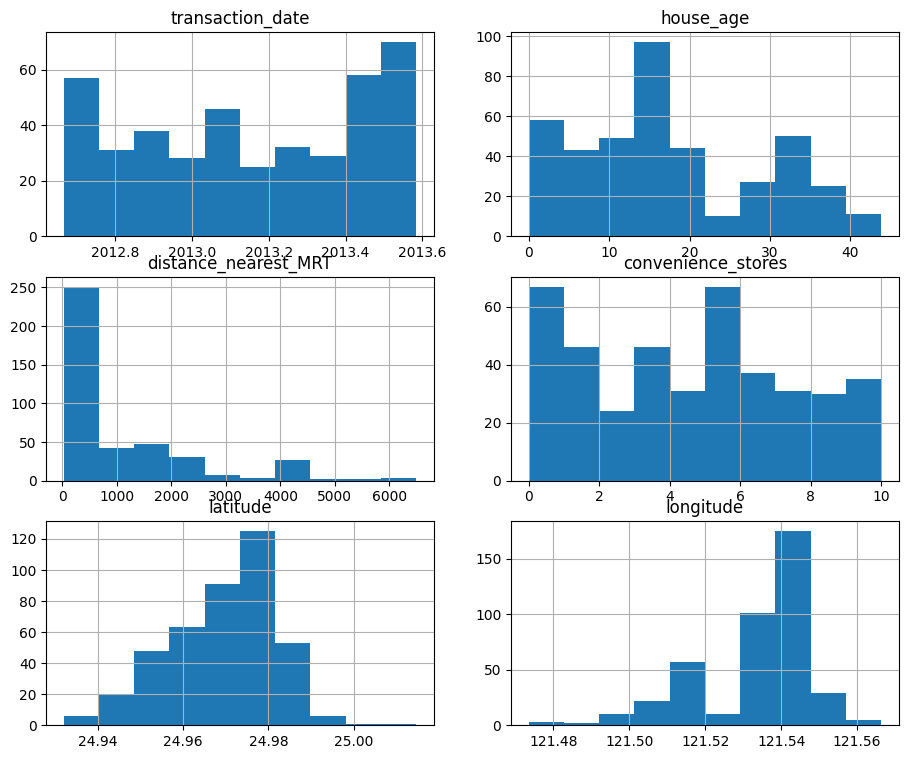

In [57]:
# 2-6 히스토그램
def histogram_iris(feature_names, dataset):
    i=1
    plt.figure(figsize=(11,9)) #사이즈
    for col in feature_names:  # X변수에 해당하는 그래프 개수를 그리기
        plt.subplot(3,2,i)     # 두 줄에 두 칸을 만들어서 인덱스 순으로 그리기
        plt.axis('on')
        plt.tick_params(axis='both',left =True)
        
        dataset[col].hist()
        plt.title(col)
        i +=1
    plt.show()
histogram_iris(rest.columns[:-1],rest)

### 2-6 히스토그램
1. 거래일은 고르게 분포되어있으나 최근이 더 많다
2. 10~20년된 집이 많고 그 다음으로은 0~10 30~40년 된 집 순이다
3. 대중교통과의 거리는 대부분 가깝지만 먼 곳도 존재
4. 편의점 까지의 거리는 대부분 고르게 분포되어있다
5. 위도는 24 언저리에서 많이 살고 있다 
6. 경도는 121 언저리에서 많이 살고 있다

<Figure size 1100x900 with 0 Axes>

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0, 0, '1.0')])

<AxesSubplot: >

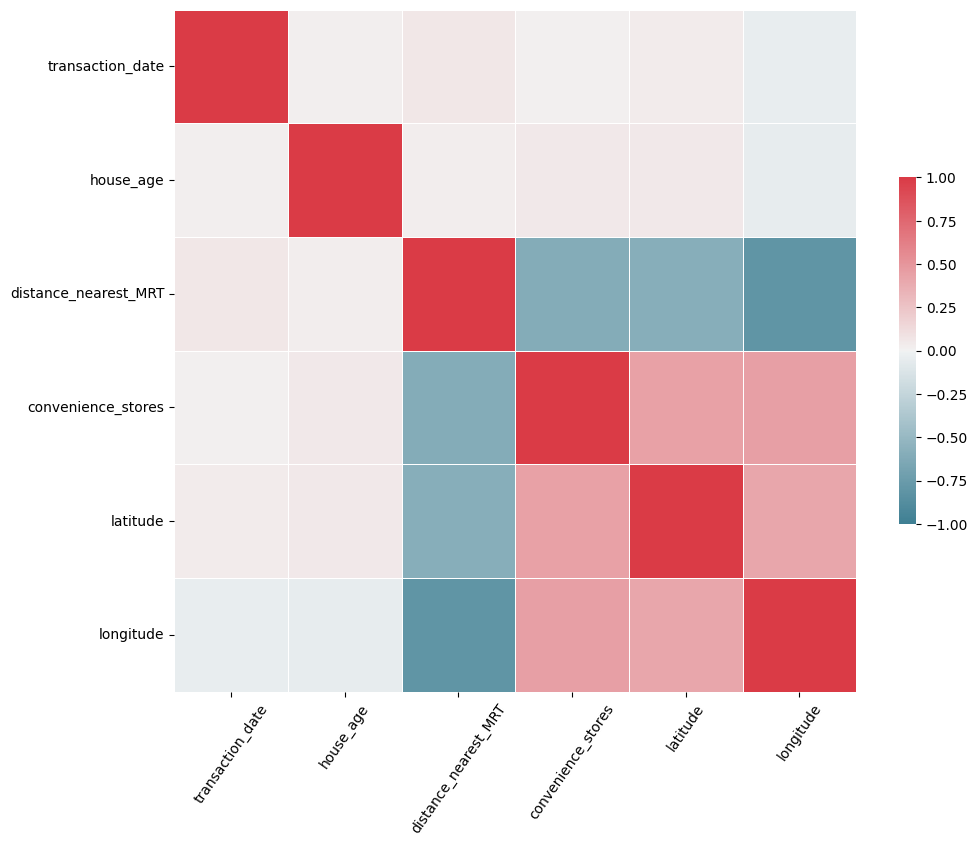

In [95]:
# 2-7 상관관계 시각화-1
rest_data = rest.drop("house_price", axis ='columns')
corr = rest_data.corr()
cmap = sns.diverging_palette(220,10,as_cmap=True)

plt.figure(figsize =(11,9))
plt.xticks(rotation = 55)
sns.heatmap(corr, cmap = cmap, vmax=1.0, vmin = -1.0, center =0, square= True, linewidths=.5, cbar_kws={'shrink':.5})
plt.show()

<Figure size 1100x900 with 0 Axes>

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0, 0, '1.0')])

<AxesSubplot: >

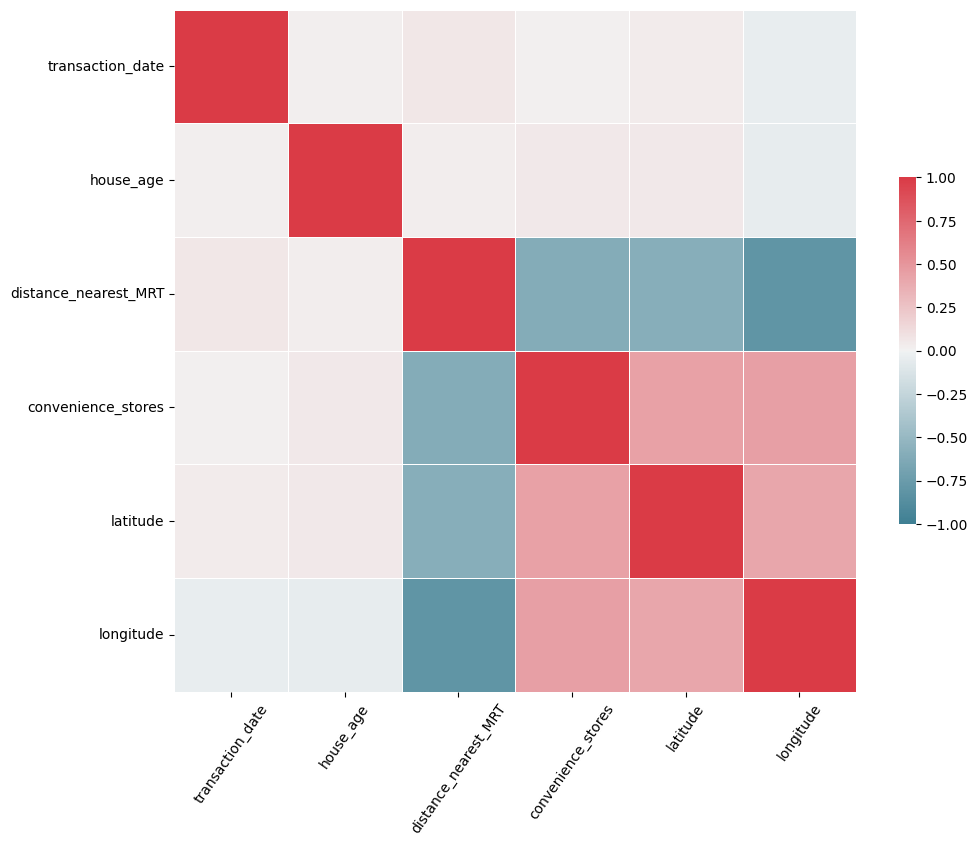

In [94]:
# 2-7 상관관계 시각화-1
corr = rest.drop("house_price", axis ='columns').corr()
cmap = sns.diverging_palette(220,10,as_cmap=True)

plt.figure(figsize =(11,9))
plt.xticks(rotation = 55)
sns.heatmap(corr, cmap = cmap, vmax=1.0, vmin = -1.0, center =0, square= True, linewidths=.5, cbar_kws={'shrink':.5})
plt.show()

### 2-7 상관관계 시각화
- heatmap으로 상관관계를 살펴보면 위도 경도가 오를 때 가격이 증가한다는데 의미가 있을까라는 생각이 든다.
- 위도 경도가 높은 지역이 부자 동네이다 정도의 의미를 가질 수 있을 것 같다

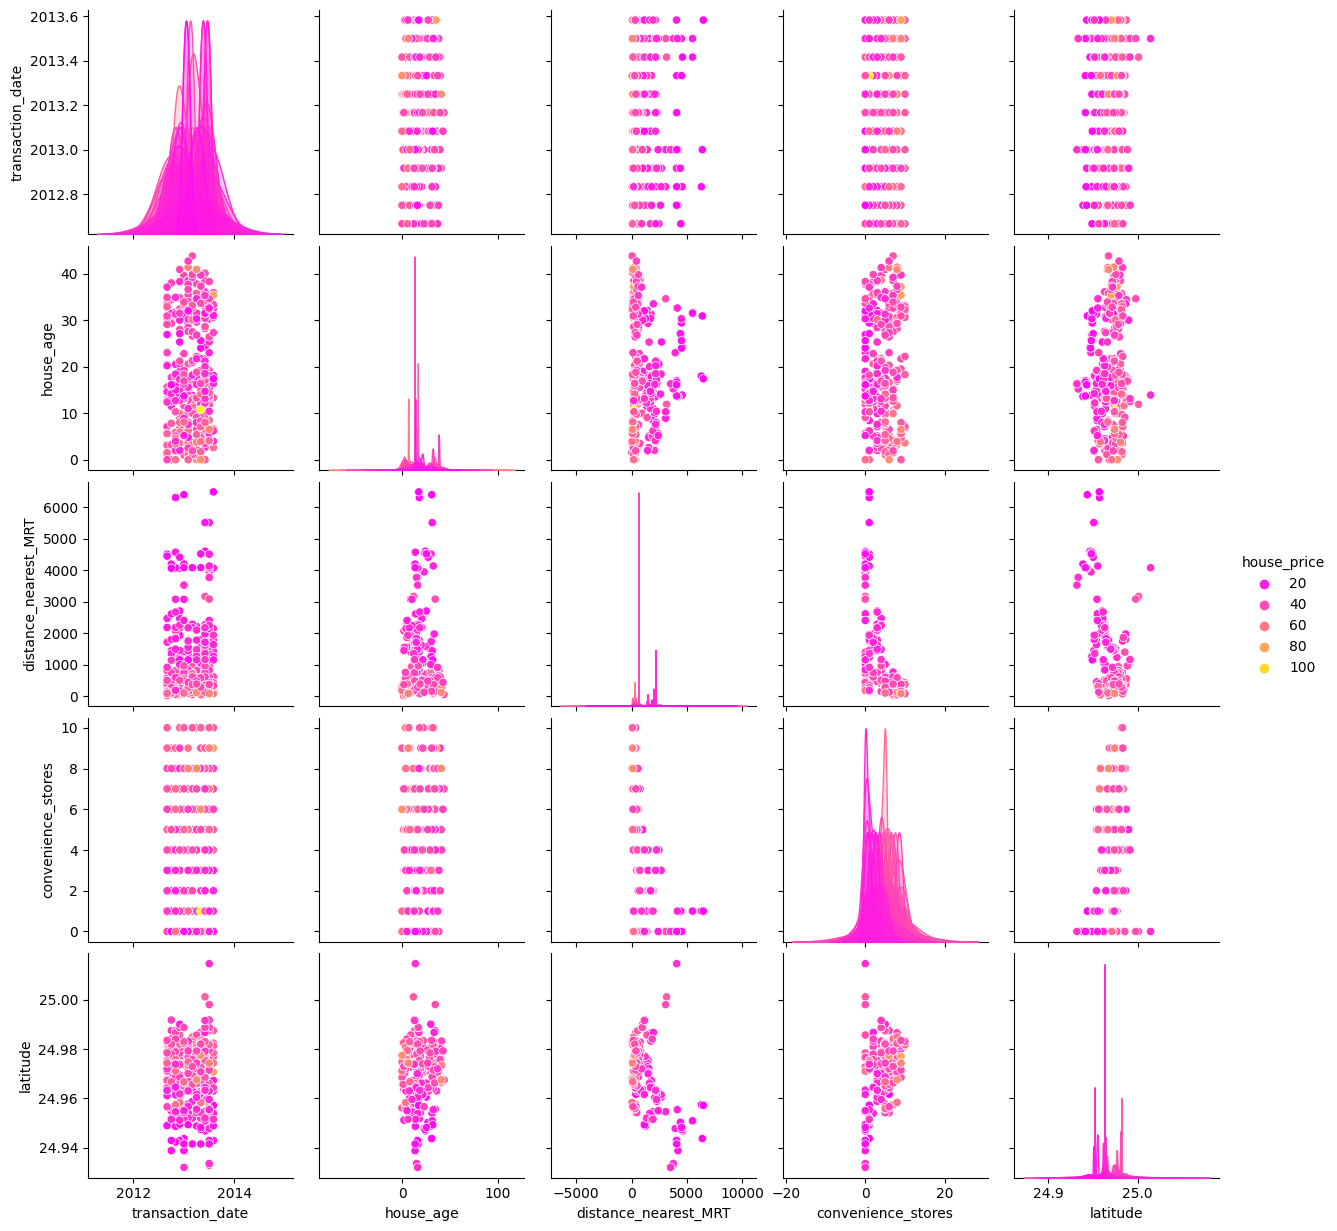

In [101]:
# 2-8 pairplot
sns.pairplot(rest, vars=['transaction_date', 'house_age', 'distance_nearest_MRT',
'convenience_stores', 'latitude'], palette='spring', hue='house_price')
plt.show()
# house_price

In [109]:
rest01 = rest.drop("longitude", axis ='columns')
rest01

,transaction_date,house_age,distance_nearest_MRT,convenience_stores,latitude,house_price
0,2012.916667,32.0,84.87882,10,24.98298,37.9
1,2012.916667,19.5,306.59470,9,24.98034,42.2
2,2013.583333,13.3,561.98450,5,24.98746,47.3
3,2013.500000,13.3,561.98450,5,24.98746,54.8
4,2012.833333,5.0,390.56840,5,24.97937,43.1
...,...,...,...,...,...,...
409,2013.000000,13.7,4082.01500,0,24.94155,15.4
410,2012.666667,5.6,90.45606,9,24.97433,50.0
411,2013.250000,18.8,390.96960,7,24.97923,40.6
412,2013.000000,8.1,104.81010,5,24.96674,52.5


In [119]:
# # 2-9 데이터 분리
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = \
# train_test_split(rest01.iloc[:,:-1],rest01.iloc[:,-1], test_size=0.33, random_state=42)

In [135]:
# 2-9 데이터 분리02
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
train_test_split(rest.iloc[:,:-1],rest.iloc[:,-1], test_size=0.33, random_state=42)

In [176]:
# 2-9-1 데이터 정규화
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

X_train_scale = std_scaler.fit_transform(X_train)
X_test_scale = std_scaler.transform(X_test)

X_scaled = pd.DataFrame(X_train_scale, columns=X_train.columns)
X_train = X_scaled
X_test = X_test_scale

C:\Users\deepBlue\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


### 3.학습

In [173]:
# from sklearn.linear_model import LogisticRegression
# model = LogisticRegression(random_state=42)
# model.fit(X_train,y_train)

In [177]:
# 3-1 target값이 범주가 아니므로 Regressor로 훈련
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train,y_train)

DecisionTreeRegressor(random_state=42)

In [178]:
model.score(X_test,y_test)

C:\Users\deepBlue\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


0.552

In [179]:
# 3-3 일반화 작업
from sklearn.model_selection import cross_val_score, KFold

cv = KFold(n_splits=7, shuffle=True, random_state=42)
results = cross_val_score(model, X_train, y_train, cv=cv)
fin_results = np.mean(results)

type(results)

for i, _ in enumerate(results):
    print('{}번째 교차 검증 정확도 : {} '.format(i,_))
    
print('최종 교차 검증 정확도 : {} '.format(fin_results))

numpy.ndarray

0번째 교차 검증 정확도 : 0.24502223146008595 
1번째 교차 검증 정확도 : 0.6666531049968987 
2번째 교차 검증 정확도 : -0.44584438758438627 
3번째 교차 검증 정확도 : 0.6667023969868355 
4번째 교차 검증 정확도 : 0.1102333435475994 
5번째 교차 검증 정확도 : 0.5045531691972553 
6번째 교차 검증 정확도 : 0.5850172757552556 
최종 교차 검증 정확도 : 0.3331910191942206 


<AxesSubplot: title={'center': 'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

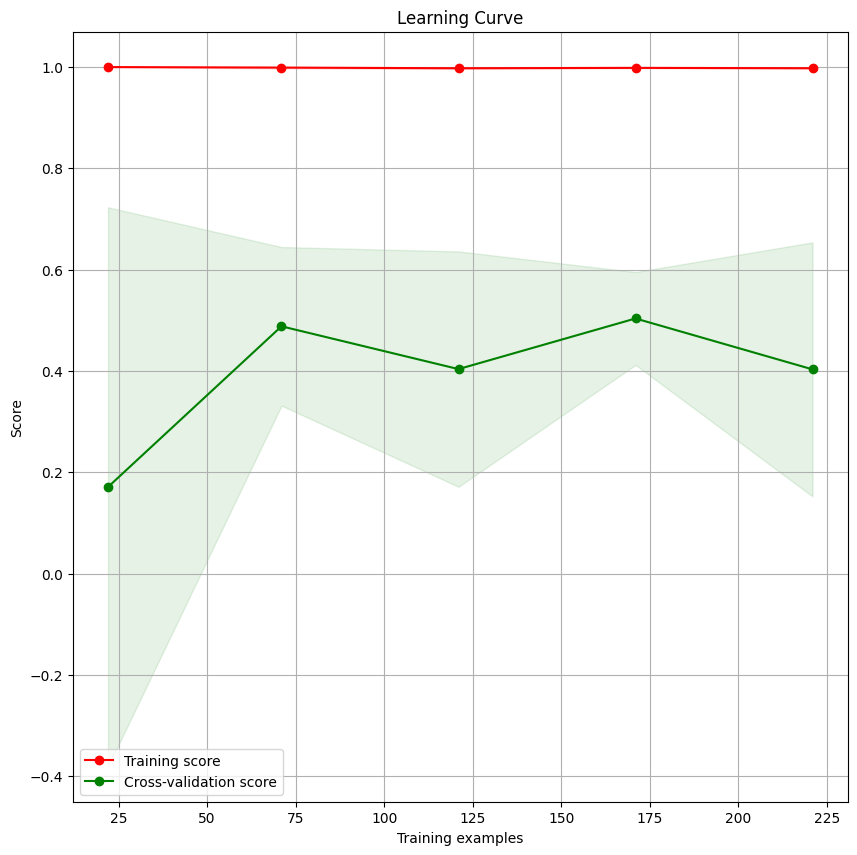

In [171]:
import scikitplot as skplt
skplt.estimators.plot_learning_curve(model, X_train, y_train, figsize=(10,10))
plt.show()

#### LogisticRegression param
LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)

penalty='l2',
dual=False, 
tol=0.0001, 
C=1.0, 
fit_intercept=True, 
intercept_scaling=1, 
class_weight=None, 
random_state=None, 
solver='lbfgs', 
max_iter=100, 
multi_class='auto', 
verbose=0, 
warm_start=False, 
n_jobs=None, 
l1_ratio=None

DecisionTreeRegressor(*, criterion='squared_error', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, ccp_alpha=0.0

*, criterion='squared_error', 
splitter='best', 
max_depth=None, 
min_samples_split=2, 
min_samples_leaf=1, 
min_weight_fraction_leaf=0.0, 
max_features=None, 
random_state=None, 
ax_leaf_nodes=None, 
min_impurity_decrease=0.0, 
ccp_alpha=0.0

In [133]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import DecisionTreeRegressor
estimator = DecisionTreeRegressor()

parameter={
    'max_depth' : [4,6,8,10,12],
    'criterion' : ['squared_error','entropy'] ,
    'splitter'  : ['best','random'],
    'min_weight_fraction_leaf' : [0.0, 0.1, 0.2, 0.3],    
    'random_state' :[7,23,42,73,178],    
    'min_impurity_decrease' :[0.0,0.2,0.5,1.0]    
}

model = GridSearchCV(estimator, param_grid=parameter, cv=cv, verbose=1, n_jobs=-1, refit=True)
# verbose 출력 실행 모듈
model.fit(X_train,y_train)

Fitting 5 folds for each of 1600 candidates, totalling 8000 fits


ValueError: 
All the 8000 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4000 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\deepBlue\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\deepBlue\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\tree\_classes.py", line 1342, in fit
    super().fit(
  File "C:\Users\deepBlue\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\tree\_classes.py", line 394, in fit
    criterion = CRITERIA_REG[self.criterion](self.n_outputs_, n_samples)
KeyError: 'gini'

--------------------------------------------------------------------------------
4000 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\deepBlue\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\deepBlue\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\tree\_classes.py", line 1342, in fit
    super().fit(
  File "C:\Users\deepBlue\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\tree\_classes.py", line 394, in fit
    criterion = CRITERIA_REG[self.criterion](self.n_outputs_, n_samples)
KeyError: 'entropy'


In [134]:
# DecisionTreeClassifier 최적값 확인
print("\nDT_best_model : \n", model.best_estimator_)
print("\nDT_best_params : \n", model.best_params_)
print("\nDT_best_socre : \n", model.best_score_)

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [114]:
rest.columns

Index(['transaction_date', 'house_age', 'distance_nearest_MRT',
       'convenience_stores', 'latitude', 'longitude', 'house_price'],
      dtype='object')